In [11]:
import numpy as np
import math
import gym
import random
import time
from matplotlib import pyplot as plt
from IPython.display import clear_output
import seaborn as sns; sns.set()

In [7]:
env = gym.make("FrozenLake-v0")

********Play 5000 episodes********

Play episodes 1-1000
Play episodes 1001-2000
Play episodes 2001-3000
Play episodes 3001-4000
Play episodes 4001-5000

********Average reward per thousand episodes********

1000 :  0.0
2000 :  0.0
3000 :  0.0
4000 :  0.0
5000 :  0.0


********Q-table********

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


********Most visited states********



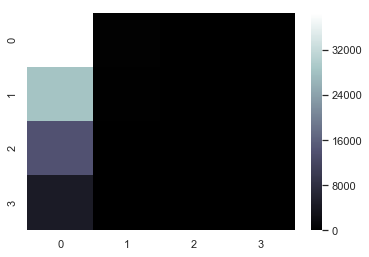

In [21]:
# Q-learning algorithm

action_space_size = env.action_space.n
state_space_size = env.observation_space.n
num_episodes = 5000
max_steps_per_episode = 100

learning_rate = 0.1
discount_rate = 0.99

exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.01

q_table = np.zeros((state_space_size, action_space_size))
softmax = lambda x: (math.e ** x) / sum(math.e ** x)
visits = np.zeros(state_space_size)
choices = np.ones((state_space_size, action_space_size))

rewards_all_episodes = []

print(f'********Play {num_episodes} episodes********\n')

for episode in range(num_episodes):
    # initialize new episode params
    state = env.reset()
    rewards_current_episode = 0.0
    
    
    if episode % 1000 == 0:
        print(f'Play episodes {episode+1}-{episode+1000}')

    for step in range(max_steps_per_episode): 
       
    
        # Exploration-exploitation trade-off
        if random.uniform(0, 1) > exploration_rate:
            action = np.argmax(q_table[state,:]) 
        else:
            # Increase likelyhood of choosing under-visited actions
            a = choices[state] / sum(choices[state])
            action_prob = softmax(-a)
            action = random.choices(np.arange(env.action_space.n), action_prob)[0]
            #action = env.action_space.sample()
        
        # Take new action
        new_state, reward, done, info = env.step(action)
        # Update Q-table
        q_table[state, action] = \
            q_table[state, action] * (1 - learning_rate) \
            + learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))
        # Set new state
        state = new_state
        # Add new reward        
        rewards_current_episode += reward
        
        # Update counters
        visits[state] += 1
        choices[state][action] += 1

        # final logic
        if done == True: 
            break

    # Exploration rate decay   
    exploration_rate = \
        min_exploration_rate \
        + (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)
                               
    # Add current episode reward to total rewards list
    rewards_all_episodes.append(rewards_current_episode)

# Calculate and print the average reward per thousand episodes
rewards_per_thosand_episodes = np.split(np.array(rewards_all_episodes),num_episodes/1000)
count = 1000

print()
print("********Average reward per thousand episodes********\n")
for r in rewards_per_thosand_episodes:
    print(count, ": ", str(sum(r/1000)))
    count += 1000

# Print updated Q-table
print("\n\n********Q-table********\n")
print(q_table)

print("\n\n********Most visited states********\n")
ax = sns.heatmap(visits.reshape([4,4]), cmap='bone')
plt.show()

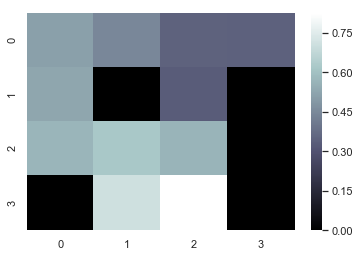

In [202]:
ax = sns.heatmap(np.max(q_table, axis=1).reshape([4,4]), cmap='bone')

In [181]:
# Watch our agent play Frozen Lake by playing the best action 
# from each state according to the Q-table

L = [1,0,0,0]
D = [0,1,0,0]
R = [0,0,1,0]
U = [0,0,0,1]
"""
    S,F,F,F
    F,H,F,H
    F,F,F,H
    H,F,F,G
"""
q_table_hard = np.array([
    L,U,L,U,
    L,L,R,L,
    U,D,L,L,
    U,R,D,L,
])

q_table_learned = np.array([
    L,U,L,L,
    L,L,R,L,
    U,D,L,L,
    L,R,D,L,
])

# ↑ ← ← ← ↑ ↑ ↑ ↑ ← → ↑ ↑ ↑ ↓ → ↑
q_table_siraj = np.array([
    L,L,L,U,
    U,U,U,U,
    L,R,U,U,
    U,D,R,U,
])

played_rewards = [] 
played_episodes = 3000
wait_short = 0.0005
wait_long = 0.0005
wait_longer = 0.005

Q = q_table_siraj
#Q = q_table_hard
#Q = q_table_learned


env.reset()
for episode in range(played_episodes):
    # initialize new episode params
    state = env.reset()
    episode_total_reward = 0.0
    done = False
    #print("*****EPISODE ", episode+1, "*****\n\n\n\n")
    #time.sleep(wait_longer)
    
    for step in range(10000):        
        # Show current state of environment on screen
        #clear_output(wait=True)
        #env.render()
        #time.sleep(wait_short)
        # Choose action with highest Q-value for current state 
        action = np.argmax(Q[state,:]) 
        # Take new action
        new_state, reward, done, info = env.step(action)
        episode_total_reward += reward
        # Done?
        if done:
            #clear_output(wait=True)
            #env.render()
            if reward == 1:
                pass
                #print("****You reached the goal!****")
            else:
                pass
                #print("****You fell through a hole!****")
            #time.sleep(wait_longer)
            #clear_output(wait=True)

            break
        # Set new state
        state = new_state
    played_rewards.append(episode_total_reward)
print(f'Average reward: {np.mean(played_rewards)}')
env.close()

Average reward: 0.0


In [108]:
vals = ['L', 'D', 'R', 'U']
print('np.array(\n[')
for x in q_table:
    print(f'{vals[np.argmax(x)]},')
print('])')
#print('np.array(\n', q_table_learned, '\n)')

np.array(
[
L,
U,
L,
L,
L,
L,
R,
L,
U,
D,
L,
L,
L,
R,
D,
L,
])


In [9]:
env.action_space.n

4